<a href="https://colab.research.google.com/github/kaurroopak/Summer-Analytics-2025---IIT-Guwahati/blob/main/SA2025W2_Kaggle_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NDVI Land Cover Classification - Summer Analytics 2025
## Week 2 Hackathon - Kaggle Competetion

In [ ]:
# Step 1: Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Step 2: Upload Files

from google.colab import files
print("⬆️ Upload train.csv and test.csv")
uploaded = files.upload()

# Load datasets
train = pd.read_csv('hacktrain.csv')
test = pd.read_csv('hacktest.csv')

print("✅ Data loaded.")
print("Train shape:", train.shape)
print("Test shape:", test.shape)

⬆️ Upload train.csv and test.csv


Saving hacktest.csv to hacktest (1).csv
Saving hacktrain.csv to hacktrain (1).csv
✅ Data loaded.
Train shape: (8000, 30)
Test shape: (2845, 29)


In [ ]:
# Step 3: Preprocessing

ndvi_columns = [col for col in train.columns if '_N' in col]

# Optional NDVI smoothing (rolling average over time points)
train_ndvi = train[ndvi_columns].copy()
test_ndvi = test[ndvi_columns].copy()

train[ndvi_columns] = train_ndvi.T.rolling(window=3, min_periods=1).mean().T
test[ndvi_columns] = test_ndvi.T.rolling(window=3, min_periods=1).mean().T


In [ ]:
print(train[ndvi_columns].isnull().sum().sum())

640


In [ ]:
print(y_train.value_counts())

class
forest        6159
farm           841
impervious     669
grass          196
water          105
orchard         30
Name: count, dtype: int64


In [ ]:
# Step 4: Feature Engineering

def add_ndvi_features(df):
    df['ndvi_mean'] = df[ndvi_columns].mean(axis=1)
    df['ndvi_std'] = df[ndvi_columns].std(axis=1)
    df['ndvi_max'] = df[ndvi_columns].max(axis=1)
    df['ndvi_min'] = df[ndvi_columns].min(axis=1)
    df['ndvi_range'] = df['ndvi_max'] - df['ndvi_min']
    return df

train = add_ndvi_features(train)
test = add_ndvi_features(test)

# Final feature set
features = ndvi_columns + ['ndvi_mean', 'ndvi_std', 'ndvi_max', 'ndvi_min', 'ndvi_range']

In [ ]:
# Step 5: Step 5: Impute + Scale

imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(train[features])
X_test = imputer.transform(test[features])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Step 6: Step 6: Encode Target Labels

y_train = train['class']
y_train_encoded = y_train.astype('category').cat.codes
label_mapping = dict(enumerate(y_train.astype('category').cat.categories))
reverse_mapping = {v: k for k, v in label_mapping.items()}
print("📌 Label Mapping:", label_mapping)

📌 Label Mapping: {0: 'farm', 1: 'forest', 2: 'grass', 3: 'impervious', 4: 'orchard', 5: 'water'}


In [ ]:
# Step 7: Train/Validation Split

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train, y_train_encoded, test_size=0.2, stratify=y_train_encoded, random_state=42
)

In [ ]:
# Step 8: Train Logistic Regression

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
model.fit(X_tr, y_tr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial', random_state=42)


✅ Validation Accuracy: 0.8762

📄 Classification Report:
              precision    recall  f1-score   support

        farm       0.66      0.45      0.53       168
      forest       0.91      0.97      0.94      1232
       grass       0.70      0.18      0.29        39
  impervious       0.79      0.84      0.82       134
     orchard       0.00      0.00      0.00         6
       water       0.80      0.57      0.67        21

    accuracy                           0.88      1600
   macro avg       0.64      0.50      0.54      1600
weighted avg       0.86      0.88      0.86      1600



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


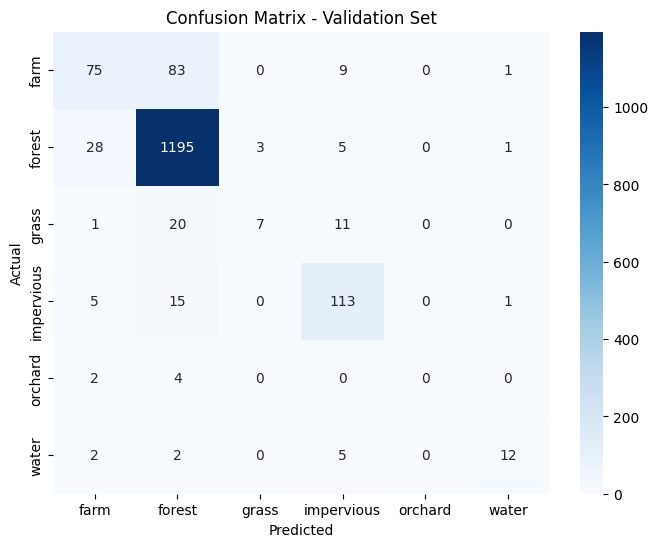

In [ ]:
# Step 9: Evaluate Validation Performance

val_preds = model.predict(X_val)
val_accuracy = accuracy_score(y_val, val_preds)
print(f"\n✅ Validation Accuracy: {val_accuracy:.4f}")
print("\n📄 Classification Report:")
print(classification_report(y_val, val_preds, target_names=label_mapping.values()))

cm = confusion_matrix(y_val, val_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_mapping.values(),
            yticklabels=label_mapping.values())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.show()

In [ ]:
# Step 10: Retrain on Full Data

final_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
final_model.fit(X_train, y_train_encoded)
test_preds = final_model.predict(X_test)
test_preds_labels = [label_mapping[i] for i in test_preds]

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Step 11: Create Submission File

submission = pd.DataFrame({
    'ID': test['ID'],
    'class': test_preds_labels
})
submission.to_csv('submission.csv', index=False)
print("📁 submission.csv created!")

📁 submission.csv created!


In [ ]:
# Download submission
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission.head()

,ID,class
0,1,forest
1,2,forest
2,3,forest
3,4,forest
4,5,forest
